In [1]:
import numpy as np
import os
import pandas as pd
import neurokit2 as nk
from scipy.signal import find_peaks
from scipy import signal
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import timedelta

In [4]:
root_directory1 = r"C:\Users\manar.gani\Desktop\data\Physiological"

In [3]:
def read_eda_files(root_folder):
    all_data = pd.DataFrame(columns=['ID', 'Task', 'EDA'])  # DataFrame to store the ECG data
    # Recursive traversal of all files in the root folder
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            # Check if the file is an EDA data file
            if file.endswith("_eda_data.csv"):
                # Extract the individual ID and task from the file name
                file_parts = file.split('_')
                id = file_parts[0]  # Assuming the individual ID is the first part of the file name
                task = file_parts[1]  # Assuming the task is the second part of the file name

                # Read the ECG data from the file and add it to the DataFrame
                try:
                    eda_data = pd.read_csv(os.path.join(root, file))
                    eda_values = eda_data.values.flatten()
                    df = pd.DataFrame({'ID': id, 'Task': task, 'EDA': eda_values})
                    all_data = pd.concat([all_data, df], ignore_index=True)
                except Exception as e:
                    print(f"Error reading file {file}: {e}")

    all_data.to_csv(r'C:\Users\manar.gani\Project\EDA\eda_dataset.csv',sep=';', index=False)

    return all_data

In [ ]:
eda_df = read_eda_files(root_directory1)

In [ ]:
eda_df

In [ ]:
eda=eda_df.to_csv

In [ ]:
eda

In [6]:
root_folder = r"C:\Users\manar.gani\Project\EDA\eda_dataset.csv"
destination_folder = r"C:\Users\manar.gani\Project\PREPROCESSING"

In [7]:
# fonction qui lit le fichier csv contennant toutes les résultats des expériences ecg
def read_dataset_csv(root_folder):
    dataset_df = pd.read_csv(root_folder, sep=";")
    return dataset_df
dataset_df = read_dataset_csv(root_folder)

In [8]:
def creation_base_time(data):
    time=[0]
    tmp = 0
    for i in range(len(data)-1):
        tmp = i*(60/len(data))
        time.append(round(tmp, 3))
    return time  

In [9]:
def preprocessing_one_eda_signal(ID, Task, data, destination_folder, figure):
    #creation base de temps car pas le même nombre de point pour chaque expérience
    time = creation_base_time(data)
    
    #Filtrage
    signal_filtered = nk.signal_filter(data["EDA"].values,500, highcut=3, method = "butterworth", order=4)
    
    #dataframe avec le temps les données filtrées et non filtrées
    eda_df = pd.DataFrame({"Time" : time, "EDA_Raw" : data["EDA"], "EDA_Filtered" : signal_filtered})
   
    #tracé de des courbes avant et après filtrage
    if figure:
        eda_df[15000:30000].plot(x="Time", y=["EDA_Raw","EDA_Filtered"], title="Comparaison signaux EDA",figsize=(12,4))
        plt.xlabel("Time(s)")
        plt.ylabel("Amplitude")

    #Enregistrement du dataframe en fichier csv 
    filename = ID + '_' + Task + '_eda_data_filtered.csv'
    completeDestination = destination_folder + "\\"+ ID
        #Création des dossiers de la base donnée
    if not os.path.exists(completeDestination):
        os.makedirs(completeDestination)
    eda_df.to_csv(os.path.join(completeDestination, filename), sep=';', index=False)

    
    
    return

In [10]:
def preprocessing_eda_datas(root_folder, destination_folder):
    #ouverture de la base de donnée
    dataset_df = read_dataset_csv(root_folder)
    
    #traitement de tous les signaux 
    groups=dataset_df.groupby(['ID', 'Task'])
    for (iden, task), group in tqdm(groups):
        group_data = groups.get_group((iden, task))
        preprocessing_one_eda_signal(iden, task, group_data, destination_folder, False)
        
    return 

In [11]:
#commande à éxécuter pour filtrer tous les signaux ecg pour chaque personne et expérience
preprocessing_eda_datas(root_folder, destination_folder)

100%|██████████| 764/764 [04:28<00:00,  2.84it/s]


In [12]:
def read_eda_filtered_files(root_folder):
    all_data = pd.DataFrame(columns=['ID', 'Task', 'EDA_Raw', 'EDA_Clean'])  # DataFrame to store the ECG data
    # Recursive traversal of all files in the root folder
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            # Check if the file is an ECG data file
            if file.endswith("_eda_data_filtered.csv"):
                # Extract the individual ID and task from the file name
                file_parts = file.split('_')
                id = file_parts[0]  # Assuming the individual ID is the first part of the file name
                task = file_parts[1]  # Assuming the task is the second part of the file name

                # Read the ECG data from the file and add it to the DataFrame
                try:
                    eda_data = pd.read_csv(os.path.join(root, file), sep=";")
                    eda_values_raw = eda_data['EDA_Raw'].values.flatten()
                    eda_values_cln = eda_data['EDA_Filtered'].values.flatten()
                    df = pd.DataFrame({'ID': id, 'Task': task, 'EDA_Raw': eda_values_raw, 'EDA_Filtered' : eda_values_cln})
                    all_data = pd.concat([all_data, df], ignore_index=True)
                
                except Exception as e:
                    print(f"Error reading file {file}: {e}")
                    
    all_data.to_csv(r"C:\Users\manar.gani\Project\PREPROCESSING\eda_filtered_dataset.csv", sep=';', index=False)

    return all_data

In [13]:
root_folder =r"C:\Users\manar.gani\Project\PREPROCESSING" 

In [14]:
eda_data_filtered = read_eda_filtered_files(root_folder)

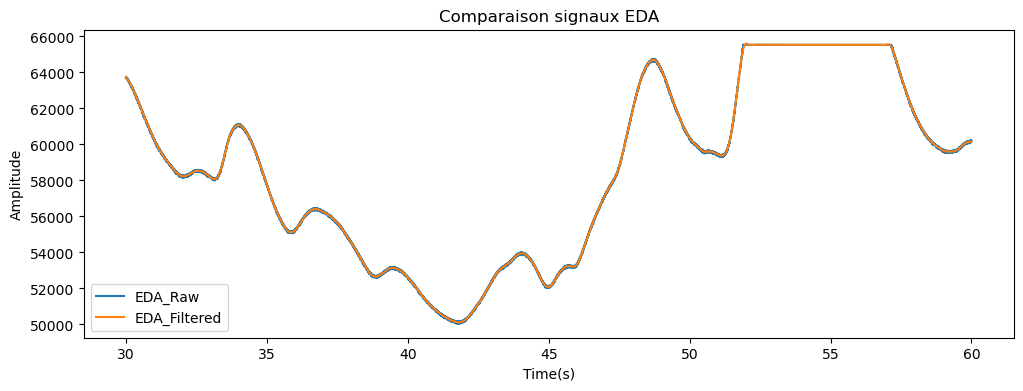

In [65]:
#pour tester le filtrage sur un fichier de notre choix
data=pd.read_csv(r'C:\Users\manar.gani\Desktop\data\Physiological\2ea4\2ea4_Counting1_eda_data.csv')

preprocessing_one_eda_signal('2ea4', 'Counting1', data, destination_folder, True)

In [ ]:
"""ecg_filtered_df = read_ecg_filtered_files(root_directory2)"""

In [ ]:
"""print(ecg_filtered_df['ECG_Clean'].isnull().sum()) #compte les missing values"""